In [1]:
import pandas as pd; pd.set_option('max_rows', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import bt
import talib

# read

In [2]:
start_date = '2003-07-29'
end_date   = '2021-09-29'

indice_tickers = ['^KS11', '^GSPC', '^IXIC',  '^N225',  '^HSI',     '^FCHI', '^GDAXI']
etf_tickers    = ['EWY',   'SPY',   'QQQ',    'EWJ',    'EWH',      'EWQ',   'EWG', 'AGG']
indice_names   = ['kospi', 'sp500', 'nasdaq', 'nikkei', 'hangseng', 'cac',   'dax']
etf_names      = ['kospi', 'sp500', 'nasdaq', 'nikkei', 'hangseng', 'cac',   'dax', 'agg']

indice = yf.download(indice_tickers, start=start_date, end=end_date)
etf    = yf.download(etf_tickers, start=start_date, end=end_date)

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  8 of 8 completed


In [3]:
indice['Adj Close']

,^FCHI,^GDAXI,^GSPC,^HSI,^IXIC,^KS11,^N225
Date,,,,,,,
2003-07-28,3164.929932,3417.770020,996.520020,10134.879883,1735.359985,NaN,NaN
2003-07-29,3142.389893,3428.120117,989.280029,10198.599609,1731.369995,722.330017,9834.309570
2003-07-30,3172.510010,3429.030029,987.489990,10121.219727,1720.910034,714.150024,9632.660156
2003-07-31,3210.270020,3487.860107,990.309998,10134.830078,1735.020020,713.520020,9563.209961
2003-08-01,3169.629883,3438.889893,980.150024,10248.599609,1715.619995,727.260010,9611.669922
...,...,...,...,...,...,...,...
2021-09-22,6637.000000,15506.740234,4395.640137,NaN,14896.849609,NaN,29639.400391
2021-09-23,6701.979980,15643.969727,4448.979980,24510.980469,15052.240234,3127.580078,NaN
2021-09-24,6638.459961,15531.750000,4455.479980,24192.160156,15047.700195,3125.239990,30248.810547


In [4]:
etf['Adj Close']

,AGG,EWG,EWH,EWJ,EWQ,EWY,QQQ,SPY
Date,,,,,,,,
2003-07-28,NaN,8.589716,4.700956,24.707079,10.765284,17.662931,27.658087,69.914558
2003-07-29,NaN,8.562790,4.724344,24.390316,10.625312,17.903786,27.449930,69.592484
2003-07-30,NaN,8.475277,4.712650,23.883509,10.695294,17.767305,27.250448,69.424454
2003-07-31,NaN,8.549325,4.765271,24.073565,10.708018,17.422079,27.580029,69.585495
2003-08-01,NaN,8.414690,4.741884,23.788479,10.517147,17.767305,27.285143,68.969391
...,...,...,...,...,...,...,...,...
2021-09-22,115.815758,33.860001,24.340000,72.489998,38.189999,81.989998,369.570007,437.859985
2021-09-23,115.247543,34.320000,24.219999,72.910004,38.860001,83.959999,372.980011,443.179993
2021-09-24,115.048172,33.970001,23.590000,72.660004,38.410000,82.510002,373.329987,443.910004


# 지수와 지수추종 ETF의 상관관계

In [5]:
pd.concat([indice['Adj Close'], etf['Adj Close']], axis=1).corr().iloc[:7, -7:]

,EWG,EWH,EWJ,EWQ,EWY,QQQ,SPY
^FCHI,0.756617,0.647044,0.888781,0.880343,0.657951,0.644941,0.701003
^GDAXI,0.951660,0.973145,0.900323,0.906903,0.887160,0.885311,0.938480
^GSPC,0.865952,0.920883,0.931032,0.896461,0.836425,0.981121,0.998247
^HSI,0.918573,0.907584,0.759410,0.858014,0.892602,0.668527,0.731338
^IXIC,0.819560,0.887665,0.898105,0.856513,0.820044,0.998858,0.991390
^KS11,0.920509,0.913245,0.777692,0.845373,0.977151,0.791617,0.817217
^N225,0.838509,0.829640,0.975932,0.903471,0.755079,0.872063,0.910902


# 글라이드 패스

In [6]:
def makeGlidePath(etf_ohlcv, glide_weight, risk_weight, start_year=2011):
    
    # 날짜, 위험자산 비중 데이터프레임
    df = pd.DataFrame(
        {
            'Date': [str(year) + '-09-29' for year in range(start_year, 2022)], 
            'RA'  : glide_weight
        }
    )
    
    # 장이 열린 날짜
    df['Date'] = df.apply(lambda x: etf_ohlcv['Adj Close'].index[etf_ohlcv['Adj Close'].index.get_loc(x['Date'], method='nearest')], axis=1)
    
    # 비위험자산 비중
    df['AGG'] = 1 - df['RA']
    
    # 위험자산 비중
    risk_etfs = ['EWG', 'EWH', 'EWJ', 'EWQ', 'EWY', 'QQQ', 'SPY']
    for risk_etf, weight in zip(risk_etfs, risk_weight):
        df[risk_etf] = df['RA'] * weight
    
    df.set_index('Date', inplace=True)
    df.drop('RA', axis=1, inplace=True)
    
    return df

In [7]:
# 위험자산 한글명 [독일,   홍콩,  일본,   프랑스, 한국,   S&P,   나스닥]
# 위험자산내 비중 ['EWG', 'EWH', 'EWJ', 'EWQ', 'EWY', 'QQQ', 'SPY']
risk_weight   = [.0250, .0250, .0375, .0375, .2500, .2000, .4250]

In [8]:
# 변동성 학습-예측 데이터의 글라이드 패스
glide_weight_baseline = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
gp_train = makeGlidePath(etf, glide_weight_baseline, risk_weight, start_year=2003)
gp_train

,AGG,EWG,EWH,EWJ,EWQ,EWY,QQQ,SPY
Date,,,,,,,,
2003-09-29,0,0.025,0.025,0.0375,0.0375,0.25,0.2,0.425
2004-09-29,0,0.025,0.025,0.0375,0.0375,0.25,0.2,0.425
2005-09-29,0,0.025,0.025,0.0375,0.0375,0.25,0.2,0.425
2006-09-29,0,0.025,0.025,0.0375,0.0375,0.25,0.2,0.425
2007-09-28,0,0.025,0.025,0.0375,0.0375,0.25,0.2,0.425
2008-09-29,0,0.025,0.025,0.0375,0.0375,0.25,0.2,0.425
2009-09-29,0,0.025,0.025,0.0375,0.0375,0.25,0.2,0.425
2010-09-29,0,0.025,0.025,0.0375,0.0375,0.25,0.2,0.425
2011-09-29,0,0.025,0.025,0.0375,0.0375,0.25,0.2,0.425


# 백테스트를 통해 학습할 변동성 데이터 수집

In [9]:
train_data = etf['Adj Close'].loc['2003-07-29':]

train_strategy = bt.Strategy(
    'train_portfolio', 
    algos=[
        bt.algos.
        bt.algos.SelectAll(), 
        bt.algos.WeighTarget(gp_train), 
        bt.algos.Rebalance(), 
    ]
)
train_backtest = bt.Backtest(strategy=train_strategy, data=train_data)
train_result   = bt.run(train_backtest)

In [10]:
train_hv = train_result.prices
train_hv['HV'] = train_hv['train_portfolio'].pct_change().rolling(window=20, min_periods=0, center=False).std() * np.sqrt(252)
train_hv = train_hv['2003-09-29':]
train_hv

,train_portfolio,HV
2003-09-29,100.000000,0.000000
2003-09-30,98.666170,0.047346
2003-10-01,101.496189,0.114521
2003-10-02,102.256268,0.116916
2003-10-03,104.068564,0.130730
...,...,...
2021-09-22,664.495908,0.116953
2021-09-23,673.861861,0.128578
2021-09-24,670.686636,0.126863
2021-09-27,669.888567,0.120544


# 웹 출력값

In [11]:
train_result.get_security_weights()['2003-09-29':]

,EWG,EWH,EWJ,EWQ,EWY,QQQ,SPY
2003-09-29,0.024993,0.024997,0.037495,0.037492,0.249992,0.199988,0.424971
2003-09-30,0.024951,0.025282,0.037488,0.037756,0.249630,0.198288,0.426534
2003-10-01,0.025170,0.025303,0.037940,0.037585,0.253354,0.197100,0.423478
2003-10-02,0.024500,0.025811,0.038402,0.036986,0.256096,0.196284,0.421853
2003-10-03,0.024662,0.025766,0.038423,0.037223,0.257290,0.198258,0.418310
...,...,...,...,...,...,...,...
2021-09-22,0.022599,0.021769,0.035160,0.039466,0.243701,0.205003,0.432262
2021-09-23,0.022588,0.021360,0.034872,0.039600,0.246088,0.204019,0.431433
2021-09-24,0.022463,0.020903,0.034917,0.039327,0.242983,0.205177,0.434189
2021-09-27,0.022523,0.021079,0.034930,0.039466,0.244717,0.203782,0.433463


In [12]:
train_result.stats

,train_portfolio
start,2003-07-28 00:00:00
end,2021-09-28 00:00:00
rf,0.0
total_return,5.546698
cagr,0.108939
max_drawdown,-0.58885
calmar,0.185003
mtd,-0.045442
three_month,-0.028699
six_month,0.04469


In [13]:
train_result.display_monthly_returns()

  Year    Jan     Feb     Mar    Apr    May    Jun    Jul    Aug     Sep     Oct    Nov    Dec     YTD
------  -----  ------  ------  -----  -----  -----  -----  -----  ------  ------  -----  -----  ------
  2003   0       0       0      0      0      0      0      0      -1.33    8.16   0.24   5.49   12.84
  2004   3.07    1.51   -0.37  -4.2    0.81   1.35  -5.78   2.22    2.04    2.48   6.5    3.44   13.22
  2005  -1.1     4.22   -3.54  -2.65   4.23  -0.58   7.06  -1.03    4.77   -3.11   5.72   2.76   17.2
  2006   4.62   -1.36    1.77   2.7   -5.55  -0.07  -0.55   2.56    2.21    3.19   3.15   0.79   13.85
  2007   0.16   -0.35    1.65   4.72   4.88   0.45   1.13   0.2     5.16    5.06  -6.26  -1.21   16.05
  2008  -9.16   -2.26   -0.48   6.27   1.8   -9.89  -1.01  -2.65  -10.68  -19.86  -9.66   6.05  -43.07
  2009  -6.98  -11.22   13.68  13.5    6.17  -0.51  11.1    1.98    6.87   -4.3    5.23   3.79   42.44
  2010  -4.66    2.46    7.31   1.67  -9.78  -3.2    7.89  -4.09   10.86  

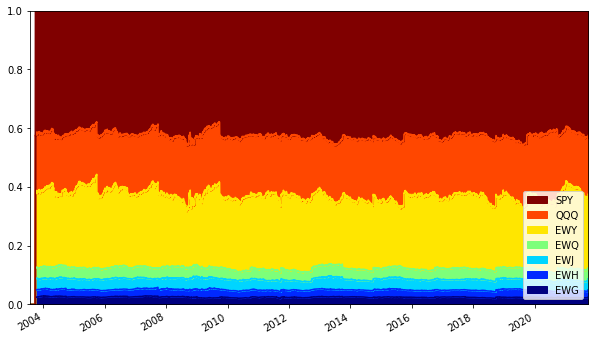

In [17]:
from matplotlib import cm
%matplotlib inline

ax = train_result.get_security_weights().plot.area(figsize = (10, 6), ylim = [0, 1], legend = False, colormap = cm.jet)
handles, labels = ax.get_legend_handles_labels()
plt.margins(0, 0)
plt.legend(reversed(handles), reversed(labels), loc='lower right')
plt.show()

<AxesSubplot:>

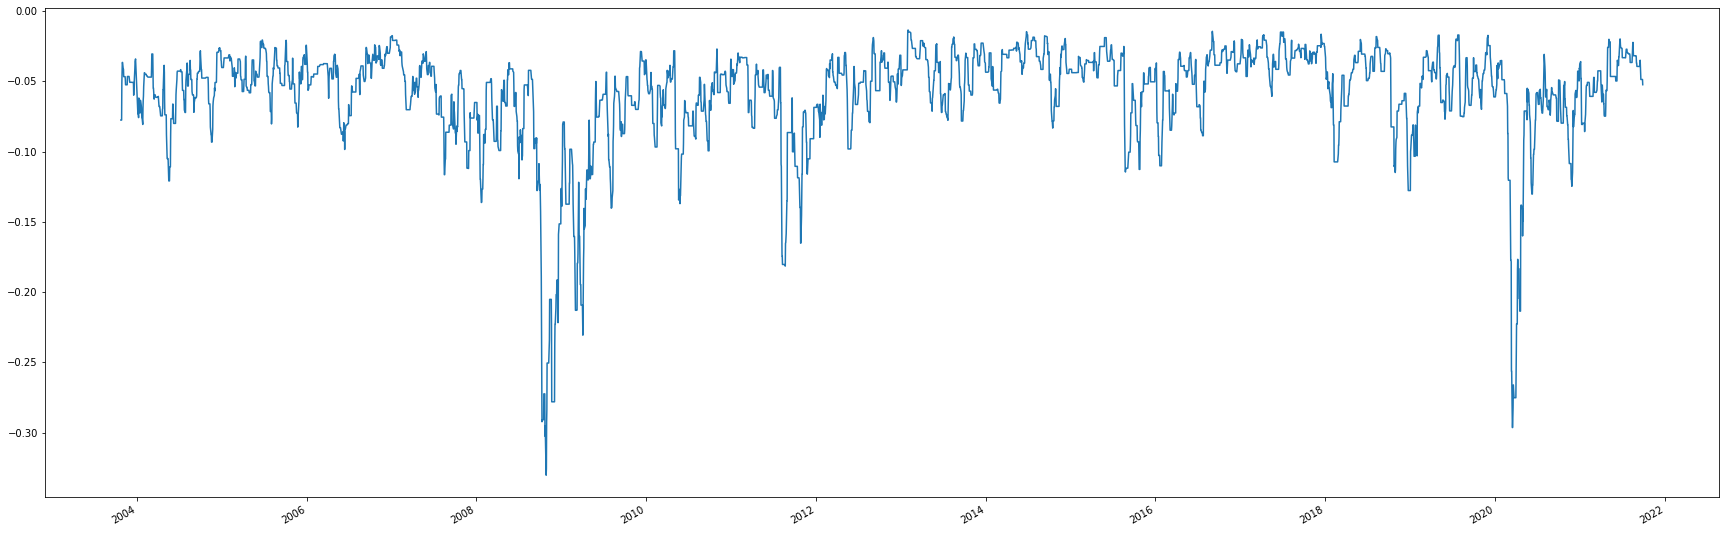

In [18]:
%matplotlib inline
((train_hv['train_portfolio'].rolling(20).min() - train_hv['train_portfolio'].rolling(20).max()) / train_hv['train_portfolio'].rolling(20).max()).plot(figsize=(30, 10))